## Using Gini Impurity for Classification

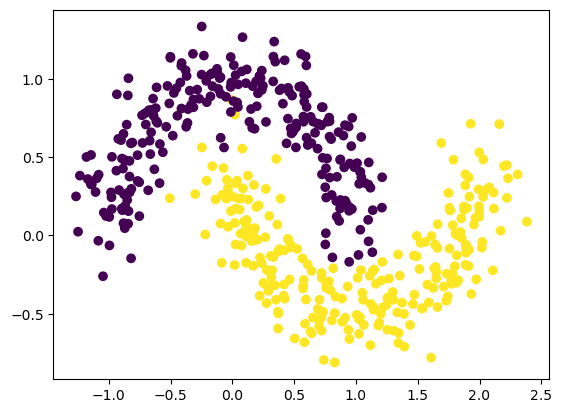

In [1]:
import numpy as np
from sklearn import metrics, inspection, datasets
from matplotlib import pyplot as plt

x_data, y_data = datasets.make_moons(n_samples=500, noise=0.15)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

### Finding the splits for the first and the second level of the tree

In [2]:
import numpy as np

def leaf_gini_impurity(leaf_ys):
    if len(leaf_ys) == 0:
        return 0
    else:
        return 1 - (sum(leaf_ys == 0) / len(leaf_ys))**2 - (sum(leaf_ys == 1) / len(leaf_ys))**2

def weighted_gini_impurity(left_ys, right_ys):
    total = len(left_ys) + len(right_ys)
    left_leaf = leaf_gini_impurity(left_ys) * len(left_ys) / total
    right_leaf = leaf_gini_impurity(right_ys) * len(right_ys) / total
    return left_leaf + right_leaf

def gini_impurity(x_data, y_data, axis, threshold):
    left_mask = x_data[:, axis] <= threshold
    right_mask = x_data[:, axis] > threshold
    return weighted_gini_impurity(y_data[left_mask], y_data[right_mask])

axes = [0, 1]

gini_x = {}
gini_y = {}

for axis in axes:
    if axis == 0:
        for data in np.arange(-1.5, 2.5, 0.1):
            gini_x[data] = gini_impurity(x_data, y_data, axis, threshold=data)
    else:
        for data in np.arange(-1.5, 2.5, 0.1):
            gini_y[data] = gini_impurity(x_data, y_data, axis, threshold=data)

min_key_x = min(gini_x, key=gini_x.get)
min_key_y = min(gini_y, key=gini_y.get)

if gini_x[min_key_x] < gini_y[min_key_y]:
    print("Split in X axis at X =", min_key_x, ". The gini impurity is:", gini_x[min_key_x], ".")
elif gini_x[min_key_x] == gini_y[min_key_y]:
    print("Split in either axes at X or Y =", min_key_x, ". The gini impurity is:", gini_x[min_key_x], ".")
else:
    print("Split in Y axis at Y =", min_key_y, ". The gini impurity is:", gini_y[min_key_y], ".")

    
#After finding the first split

# Split the dataset into two subsets based on the first split
first_axis = 1  # Y-axis
first_threshold = 0.1  # Threshold from the first split

# Masks for left and right subsets after the first split
left_mask = x_data[:, first_axis] <= first_threshold
right_mask = x_data[:, first_axis] > first_threshold

# Left and right subsets of data
x_data_left, y_data_left = x_data[left_mask], y_data[left_mask]
x_data_right, y_data_right = x_data[right_mask], y_data[right_mask]

# Dictionaries for storing Gini impurity for the second split
gini_left = {}
gini_right = {}

# Evaluate splits for the left subset
for axis in axes:
    if axis == 0:
        for data in np.arange(-1.5, 2.5, 0.1):
            gini_left[data] = gini_impurity(x_data_left, y_data_left, axis, threshold=data)
    else:
        for data in np.arange(-1.5, 2.5, 0.1):
            gini_left[data] = gini_impurity(x_data_left, y_data_left, axis, threshold=data)

# Evaluate splits for the right subset
for axis in axes:
    if axis == 0:
        for data in np.arange(-1.5, 2.5, 0.1):
            gini_right[data] = gini_impurity(x_data_right, y_data_right, axis, threshold=data)
    else:
        for data in np.arange(-1.5, 2.5, 0.1):
            gini_right[data] = gini_impurity(x_data_right, y_data_right, axis, threshold=data)

# Find the best splits for left and right subsets
min_key_left = min(gini_left, key=gini_left.get)
min_key_right = min(gini_right, key=gini_right.get)

# Determine the better split for the second level
if gini_left[min_key_left] < gini_right[min_key_right]:
    print("Second split in Left subset on axis =", min_key_left, ". The gini impurity is:", gini_left[min_key_left], ".")
else:
    print("Second split in Right subset on axis =", min_key_right, ". The gini impurity is:", gini_right[min_key_right], ".")


Split in Y axis at Y = 0.3000000000000016 . The gini impurity is: 0.2640751319165416 .
Second split in Left subset on axis = -0.19999999999999885 . The gini impurity is: 0.14375887116974198 .
